Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 312
Code Title: | Predictive Analytics using Machine Learning
1st Semester | AY 2024-2025
**ACTIVITY NO.3** | **Classification**
**Name** | Villamor, Kurt Russel
**Section** | CPE31S3
**Date Performed**: | September 10, 2024
**Date Submitted**: | September 10, 2024
**Instructor**: | Dr. Alonica Villanueva / Engr. Roman M. Richard

## 1. Objectives

This activity aims to strengthen understanding of classification and ability to demonstrate binary, multiclass, multilabel, and multioutput classification while evaluating model performance.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Demonstrate classification for binary, multiclass, multilabel and multioutput problems.
* Evaluate the performance of different classification models through an analysis of different performance metrics.

## 3. Procedures and Outputs

In the first module, we mentioned that the most common supervised learning tasks are regression (predicting values) and classification (predicting classes). Then, we explored a regression tasks. Now we will turn our attention to classification systems.

### 3.1 MNIST

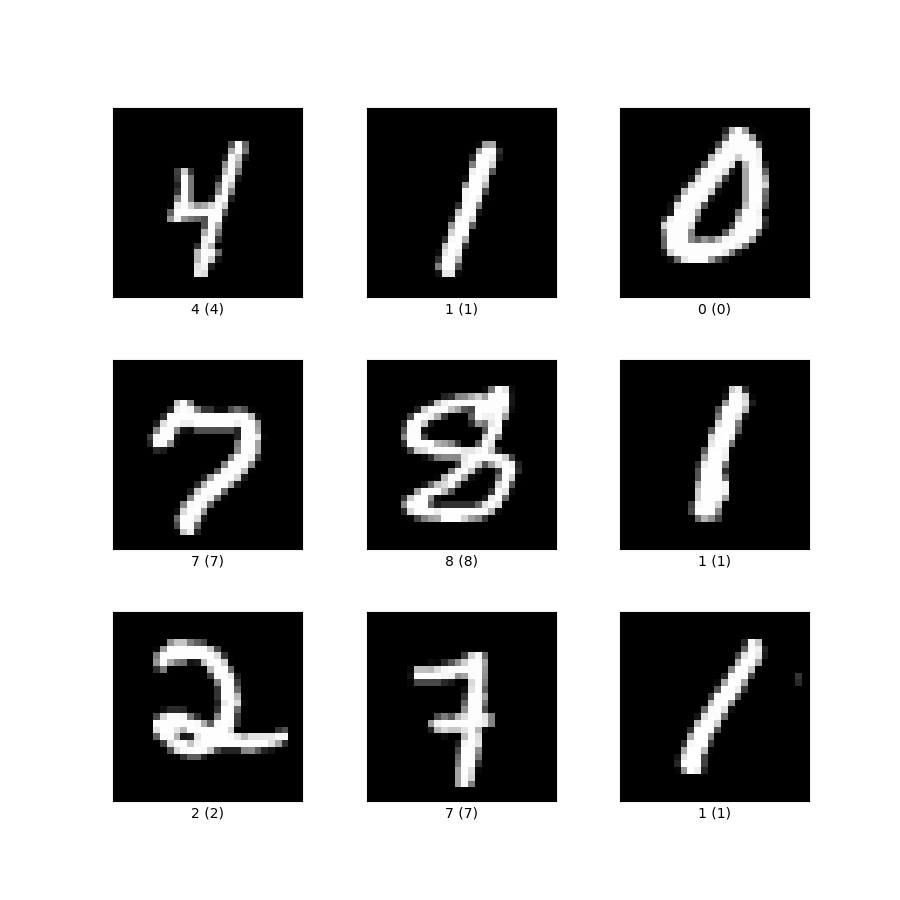

In this chapter, we will be using the MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. This set has been studied so much that it is often called the “Hello World” of Machine Learning: whenever people come up with a new classification algorithm, they are curious to see how it will perform on MNIST. Whenever someone learns Machine Learning, sooner or later they tackle MNIST.

In [1]:
import pandas as pd
import numpy as np

Scikit-Learn provides many helper functions to download popular datasets. MNIST is one of them. The following code fetches the MNIST dataset:

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

Datasets loaded by Scikit-Learn generally have a similar dictionary structure including:
* A DESCR key describing the dataset
* A data key containing an array with one row per instance and one column per feature
* A target key containing an array with the labels

In [3]:
# extra code – it's a bit too long
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
mnist.keys()  # extra code – we only use data and target in this notebook

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

There are 70,000 images, and each image has 784 features. This is because each image is 28×28 pixels, and each feature simply represents one pixel’s intensity, from 0
(white) to 255 (black). Let’s take a peek at one digit from the dataset. All you need to do is grab an instance’s feature vector, reshape it to a 28×28 array, and display it using Matplotlib’s imshow() function:

In [5]:
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
X.shape

(70000, 784)

In [7]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [8]:
y.shape

(70000,)

In [9]:
28 * 28

784

In [10]:
# Since save_fig are not added
from pathlib import Path
def save_fig(name, res=500, ext="png", tlayout = True):
    path = Path() / 'images' / f"{name}.{ext}"
    if tlayout:
        plt.tight_layout()
    plt.savefig(path,dpi=res)    

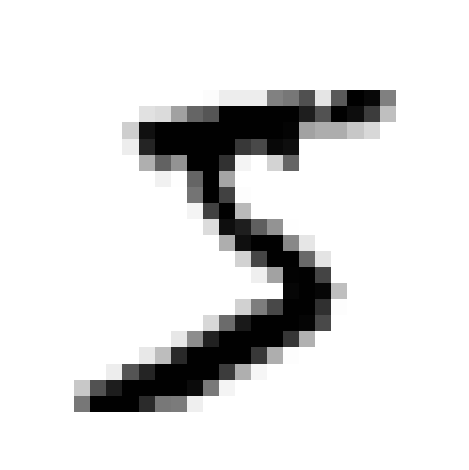

In [11]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
save_fig("some_digit_plot")  # extra code
plt.show()

In [12]:
y[0]

'5'

Note that the label is a string. We prefer numbers, so let’s cast y to integers:

In [13]:
y = y.astype(np.uint8)
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

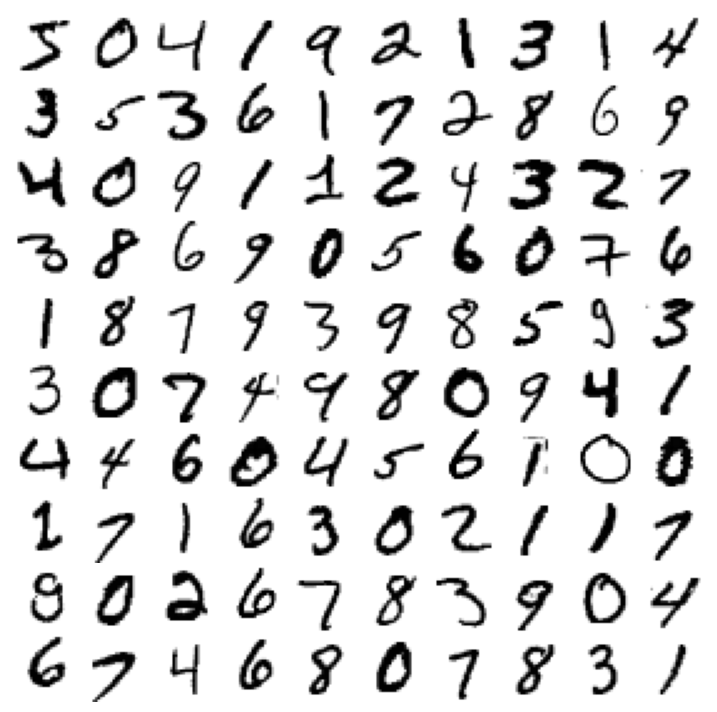

In [14]:
# extra code – this cell generates and saves Figure 3–2
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
save_fig("more_digits_plot", tlayout=False)
plt.show()

But wait! You should always create a test set and set it aside before inspecting the data closely. The MNIST dataset is actually already split into a training set (the first 60,000 images) and a test set (the last 10,000 images):

In [15]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

The training set is already shuffled for us, which is good as this guarantees that all cross-validation folds will be similar (you don’t want one fold to be missing some digits). Moreover, some learning algorithms are sensitive to the order of the training instances, and they perform poorly if they get many similar instances in a row. 
**Why do you think shuffling the dataset ensures that this won’t happen?**
- Shuffling dataset helps the model to truly learn from the dataset unlike if it was picked at a numerical order which result to a MEMORIZED Model

### 3.2 Training a Binary Classifier

Let’s simplify the problem for now and only try to identify one digit—for example, the number 5. This “5-detector” will be an example of a binary classifier, capable of distinguishing between just two classes, 5 and not-5. Let’s create the target vectors for this classification task:

In [16]:
y_train_5 = (y_train == 5)  # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

Okay, now let’s pick a classifier and train it. A good place to start is with a Stochastic Gradient Descent (SGD) classifier, using Scikit-Learn’s SGDClassifier class. This classifier has the advantage of being capable of handling very large datasets efficiently.

This is in part because SGD deals with training instances independently, one at a time (which also makes SGD well suited for online learning), as we will see later. Let’s create an SGDClassifier and train it on the whole training set:

In [17]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

**Review: How does SGD work during training? What happens when we do not set the random_state parameter?**
- Stochastic Gradient Descent picks a random record and use it to adjust the weight instead of its vanilla version where it computes all the records before adjusting the weight. The random state shuffles our dataset for more accurate in our testing process, without it we can have good performance in training and bad performanace in the testing since it just memorized the training data.

Now you can use it to detect images of the number 5:

In [18]:
sgd_clf.predict([some_digit])

array([ True])

The classifier guesses that this image represents a 5 (True). Looks like it guessed right in this particular case! Now, let’s evaluate this model’s performance.

**Perform a few tests (10 correct digits and 10 incorrect digits) and check the performance of this classifier. How well did it perform?**

In [19]:
# Testing Results
# Incorrect Digits
inc = np.unique(y_test).tolist()
inc[0] = 10
test = []
for i in inc:
    test.append(sgd_clf.predict([X[i]]).tolist()[0])

print(test)

[False, False, False, False, False, False, False, False, False, False]


In [20]:
# Correct Digits
c = [0 for i in range(10)]
test = []
for i in c:
    test.append(sgd_clf.predict([X[i]]).tolist()[0])

print(test)

[True, True, True, True, True, True, True, True, True, True]


In [21]:
# Combined Digits
import random

pop = inc + c

def testing(digit, repeats):
    for i in range(repeats):
        random.shuffle(digit)
        test = []
        for j in digit:
           test.append(sgd_clf.predict([X[j]]).tolist()[0])
        print(f"{i+1} repeatition/s - True: {(test.count(True)/10)*100}% - False: {(test.count(False)/10)*100}%")

testing(pop,10)

1 repeatition/s - True: 100.0% - False: 100.0%
2 repeatition/s - True: 100.0% - False: 100.0%
3 repeatition/s - True: 100.0% - False: 100.0%
4 repeatition/s - True: 100.0% - False: 100.0%
5 repeatition/s - True: 100.0% - False: 100.0%
6 repeatition/s - True: 100.0% - False: 100.0%
7 repeatition/s - True: 100.0% - False: 100.0%
8 repeatition/s - True: 100.0% - False: 100.0%
9 repeatition/s - True: 100.0% - False: 100.0%
10 repeatition/s - True: 100.0% - False: 100.0%


- Using the 10 incorrect and 10 correct digits, the performance seems to be **GOOD** to these probability testing

### 3.3 Performance Measures

Evaluating a classifier is often significantly trickier than evaluating a regressor, so we will spend a large part of this chapter on this topic. There are many performance metrics available, so we will check them out here!

#### 3.3.1 Measuring Accuracy Using Cross-Validation

A good way to evaluate a model is to use cross-validation.

Let’s use the `cross_val_score()` function to evaluate your SGDClassifier model using K-fold cross-validation, with three folds. Remember that K-fold cross- validation means splitting the training set into K-folds (in this case, three), then mak‐ ing predictions and evaluating them on each fold using a model trained on the remaining folds:

In [22]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

**Analyze the result**:
- What percentage of accuracy was obtained?
  - It given 3 percentages ranges from 95% to 96% 
- Why did it return 3 values?
  - since we set the cross validation (or the cv param) to 3, it cross-validates the records in 3 splits
- Provide your interpretation of this result.
  - We can say that the Binary classifier is accurate due to high accuray rate it produced.

In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)  # add shuffle=True if the dataset is not
                                       # already shuffled
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


In [24]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [25]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

That’s right, it has over 90% accuracy! This is simply because only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time. Beats Nostradamus.

This demonstrates why accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets (i.e., when some classes are much more frequent than others).


**Analyze the results:**
- How is this dataset skewed?
  - since we are predicting if the handwritten object is a five or not, the frequency of the datapoints that is actually 5 is low compared to records that is not
- Why is the 90% accuracy not reliable?
  - Class Imbalance! Example we have 500 records of a a certain group, we are task to identify if they have ADHD or they dont. For that 500 records, only 10 of the records is diagnosed with ADHD and others are diagnosed without it. With this, the model can accurately detect a person without ADHD but not in the other way around.

#### 3.3.2 Confusion Matrix

A much better way to evaluate the performance of a classifier is to look at the confusion matrix. The general idea is to count the number of times instances of class A are classified as class B. For example, to know the number of times the classifier confused images of 5s with 3s, you would look in the 5th row and 3rd column of the confusion matrix.

To compute the confusion matrix, you first need to have a set of predictions, so they can be compared to the actual targets. You could make predictions on the test set, but let’s keep it untouched for now (remember that you want to use the test set only at the very end of your project, once you have a classifier that you are ready to launch). Instead, you can use the `cross_val_predict()` function:


In [26]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

array([ True, False, False, ...,  True, False, False])

Just like the `cross_val_score()` function, `cross_val_predict()` performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold. This means that you get a clean prediction for each instance in the training set (“clean” meaning that the prediction is made by a model that never saw the data during training).



Now you are ready to get the confusion matrix using the confusion_matrix() function. Just pass it the target classes (y_train_5) and the predicted classes (y_train_pred):

In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

**Provide an analysis of the confusion matrix as instructed earlier. How well did it perform based on this metric**?

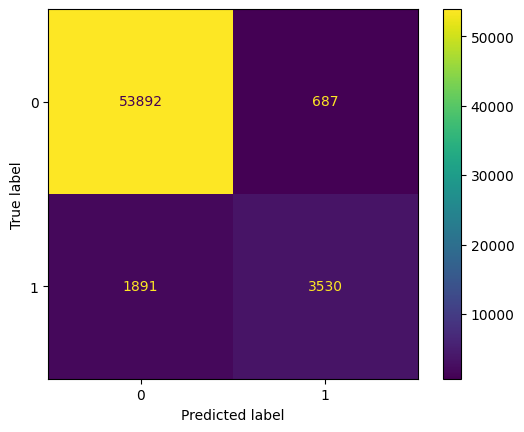

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
cmplot = ConfusionMatrixDisplay(confusion_matrix=cm)
cmplot.plot()

- Based in this confusion matrix, we can get the accuracy of the classifier:
  $$
      Accuracy = \frac{True Positive + True Negative}{Total}
  $$
- True Positive and true negative are the extremes of the confusion matrix:
  $$
      Accuracy = \frac{3530 + 53892}{60000}
  $$
  $$
      Accuracy = 0.957
  $$
- Which can be concluded as **96% accurate**

In [29]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

The confusion matrix gives you a lot of information, but sometimes you may prefer a more concise metric. An interesting one to look at is the accuracy of the positive predictions; this is called the precision of the classifier.

**What useful information can be obtained from the precision of a model?** Provide an analysis.
- Precision gives us information if our model/classifier predictions are relevant. This also assures that our model is precise to guess or the predictions are correct or in track.

#### 3.3.3 Precision and Recall

In this section, we are looking at how precision and recall affect the perform of your classifier.

**But first, define** what is precision and recall?
- Precision is the ratio of True Positives to all Positives, in other words its the accuracy of the positive predictions of the model
- Recall on the other hand is the measure of the correct identifying of the True Positives.

In [30]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)  # == 3530 / (687 + 3530)

np.float64(0.8370879772350012)

In [31]:
# extra code – this cell also computes the precision: TP / (FP + TP)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

np.float64(0.8370879772350012)

In [32]:
recall_score(y_train_5, y_train_pred)  # == 3530 / (1891 + 3530)

np.float64(0.6511713705958311)

In [33]:
# extra code – this cell also computes the recall: TP / (FN + TP)
cm[1, 1] / (cm[1, 0] + cm[1, 1])

np.float64(0.6511713705958311)

**Question:** Provide an analysis of the results from the codes above. Then define, what is f1 score and why is it an important metric?
- Precision falls under 84% and recall falls in 65%
- F1 score measures the percentage of correctness of the positive predictions
- F1 is important since it understand the balance of recall and the precision. It also weightened the decision how the model will react to a certain use case

In [34]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

np.float64(0.7325171197343847)

In [35]:
# extra code – this cell also computes the f1 score
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

np.float64(0.7325171197343847)

#### 3.3.4 The ROC Curve

**Before proceeding, what is the relationship between precision and recall?**
- They are inversely proportional, the higher the recall the lower the precision

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate (another name for recall) against the false positive rate. The FPR is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the true negative rate, which is the ratio of negative instances that are correctly classified as negative. The TNR is also called specificity. Hence the ROC curve plots sensitivity (recall) versus 1 – specificity.

In [36]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [37]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

**Question** Why do we need to compute for the fpr and tpr? What does the `roc_curve()` function do?
- TPR or True Positive Rate computed for the same reason we compute recall. It has the same formula as the recall 
- FPR or the False Positive Rate are computed to check the efficiency of the model created
- roc_curve() computes the Receiver Operating Characteristic and returns both False Positive rate and true Positive rate including the thresholds

In [38]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

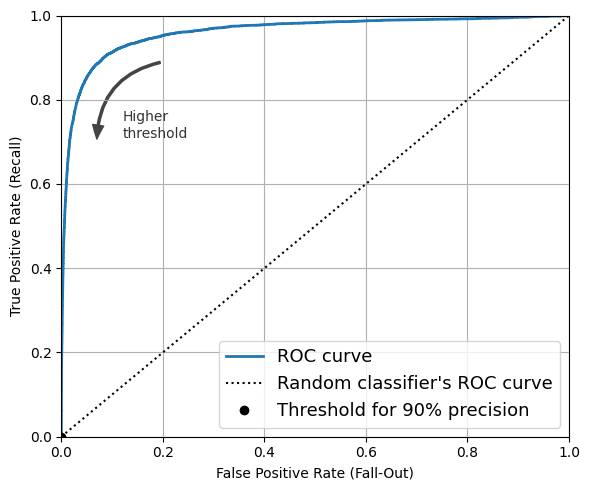

In [39]:
from matplotlib import patches

threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
idx_for_threshold_at_90 = (thresholds <= threshold_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
save_fig("roc_curve_plot")

plt.show()

In [40]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

np.float64(0.9604938554008616)

**Question** Provide an analysis of this tradeoff between precision and recall.

### 3.4 Multiclass Classification

Whereas binary classifiers distinguish between two classes, multiclass classifiers (also called multinomial classifiers) can distinguish between more than two classes.


Some algorithms (such as Random Forest classifiers or naive Bayes classifiers) are capable of handling multiple classes directly. Others (such as Support Vector Machine classifiers or Linear classifiers) are strictly binary classifiers. However, there are vari‐ ous strategies that you can use to perform multiclass classification using multiple binary classifiers.

**Question:** Some strategies used for multiclass classification is OvO and OvA. Briefly research and discuss what is OvO and OvA?
- OvO strategy makes use of every possible pairs of classes in your model which lead to a computationally expensive for large number of classes, while OvA strategy trained for each class against all the other classes. It is more efficient in large number of classes.
- Mathematically speaking, OvO takes N as its classes therefore N(N-1)/2 of classifiers are trained, while OvA takes N as its classes and N for trained binary classifications.

Scikit-Learn detects when you try to use a binary classification algorithm for a multiclass classification task, and it automatically runs OvA (except for SVM classifiers for which it uses OvO). Let’s try this with the SGDClassifier:

In [41]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [42]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

**Warning:** the following two cells may take a few minutes each to run:

In [43]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

**Question**: What is your analysis of the result here? What happened to the SGDClassifier?
- 

Hypertune the parameters to achieve a 95% accuracy.

In [45]:
sgd_clf = SGDClassifier(alpha=0.001, random_state=42,)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([5], dtype=uint8)

In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.9034 , 0.90395, 0.9088 ])

## 4. Supplementary Activity

Solve the following exercise:

1. Create your own dataset using your own handwriting.
2. Train the same model that was used in section 3 with your own dataset, observe the result.
3. How does MNIST dataset perform on your handwriting?
4. How does your custom dataset perform on any digit from the MNIST dataset?

Provide an analysis that provides an overview of the multiclass classification metrics.

- Now lets load my own dataset

In [176]:
dataset_path = "customdataset_VILLAMOR.csv"
image_size=(28,28) #add 3 if RGB image

def load():
    data = pd.read_csv(dataset_path)
    pixels = data['DATA'].tolist()
    width, height= 28, 28 ,# add depth 3 if RGB image
    faces = []
    for pixel_sequence in pixels:
        face = [int(pixel) for pixel in pixel_sequence.split(' ')]
        face = np.asarray(face).reshape(width, height,) #add depth if RGB image
        # a = face
        face = np.resize(face.astype('uint8'),image_size)
        faces.append(face.astype('float32'))
    faces = np.asarray(faces)
    A = faces
    faces = np.expand_dims(faces, -1)
    return faces, A

faces, A = load()
A.shape

(154, 28, 28)

- since the Data feature is now treated as an str, we need to change it to a array of 28*28 array

In [178]:
handdf = pd.read_csv("customdataset_VILLAMOR.csv")
data = []
for i in handdf.index:
    data.append(A[i])
data = pd.Series(data)
handdf["DATA"] = data
handdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DIGIT   154 non-null    int64 
 1   DATA    154 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


- Lets Create a function for the convinience of plotting the digits

In [185]:
def plot_digits(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="gray")
    plt.axis("off")

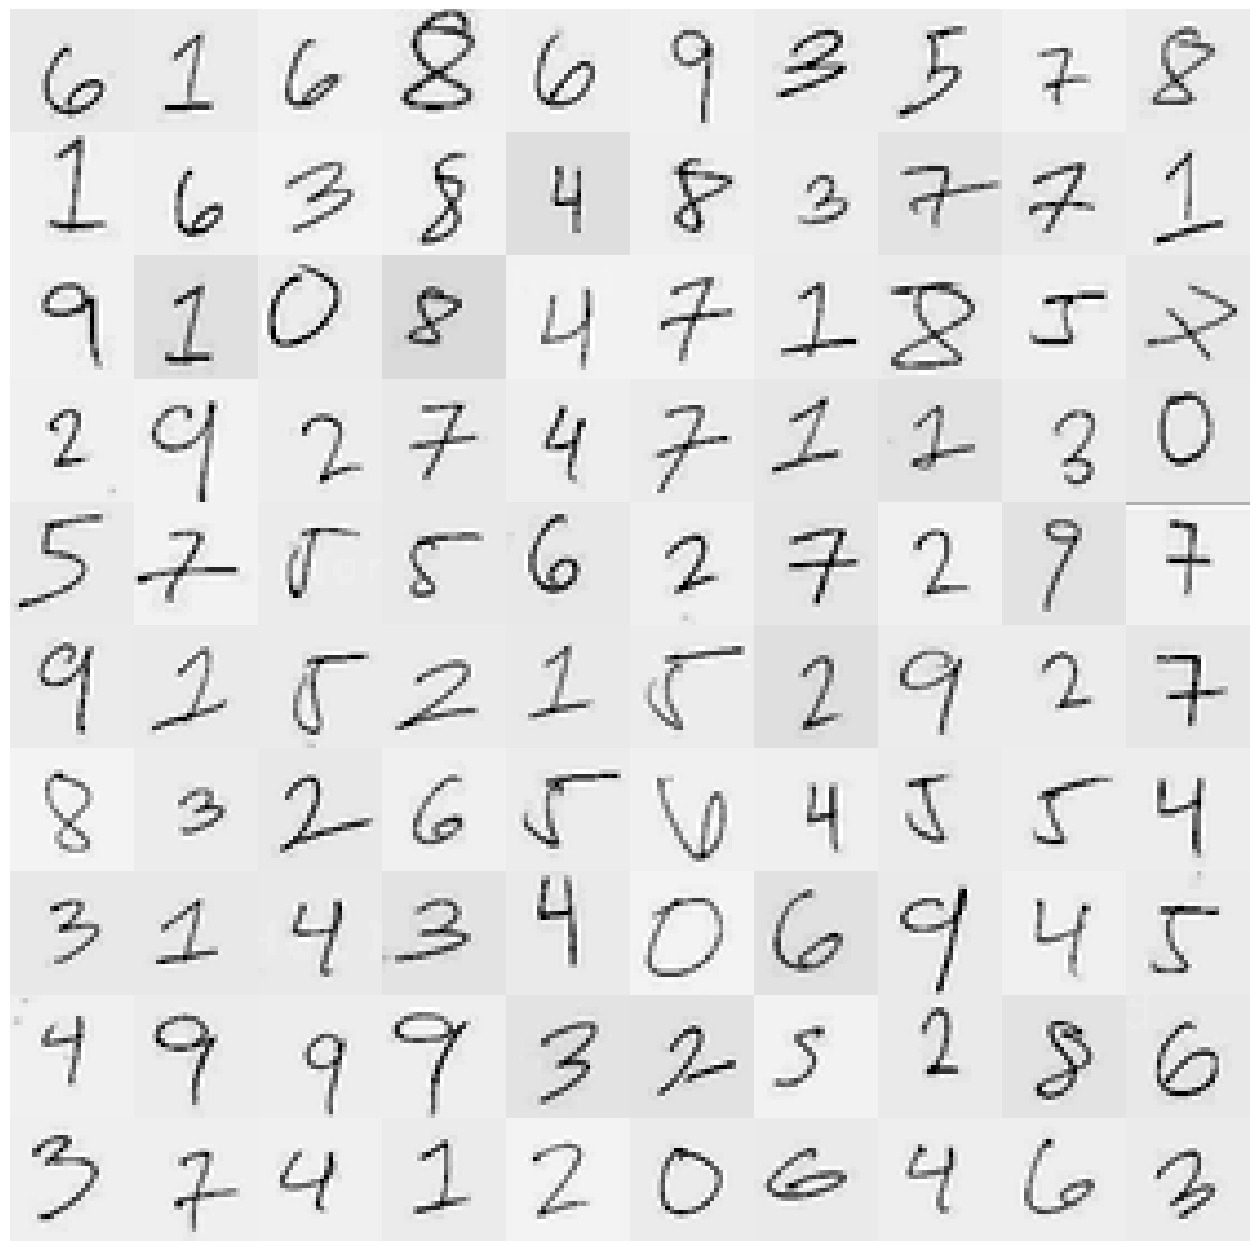

In [190]:
plt.figure(figsize=(16, 16))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digits(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

- seems that this data is not consistent and has some notable noise that makes them not uniform, this will bring significant problems in the future. But for now lets proceed to these records

- since this data set seems to have its group in sets, we need to shuffle it a bit

In [191]:
from sklearn.utils import shuffle
handdf = shuffle(handdf)

In [198]:
X,y = handdf.DATA,handdf.DIGIT

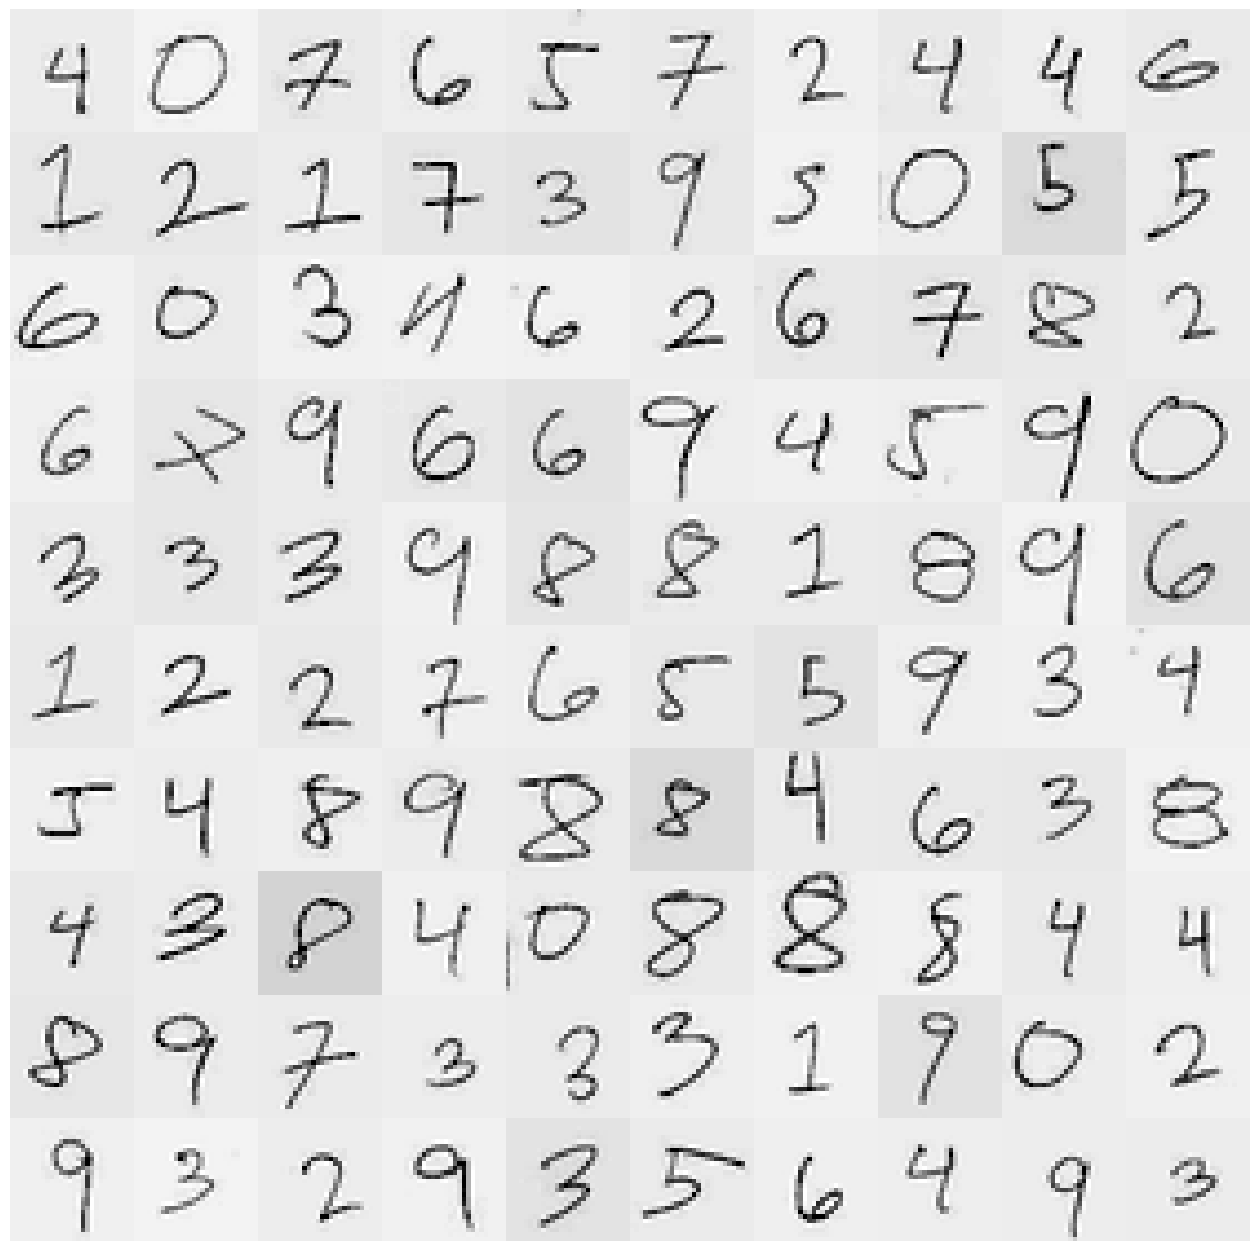

In [193]:
plt.figure(figsize=(16, 16))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digits(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

- lets proceed for the model creation

In [232]:
X = X.astype(dtype="object")

In [233]:
from sklearn.model_selection import train_test_split

X_train_me, X_test_me, y_train_me, y_test_me = train_test_split(X, y, test_size=0.15, random_state=42)
X_train_me[0]

array([[227., 227., 227., 227., 227., 227., 227., 227., 227., 227., 227.,
        227., 227., 227., 227., 227., 227., 227., 227., 227., 227., 227.,
        227., 227., 227., 227., 227., 227.],
       [227., 227., 227., 227., 227., 227., 227., 227., 227., 227., 227.,
        227., 227., 227., 227., 227., 227., 227., 227., 227., 227., 227.,
        227., 227., 227., 227., 227., 227.],
       [227., 227., 227., 227., 227., 227., 227., 227., 227., 227., 227.,
        227., 227., 227., 227., 227., 227., 227., 227., 227., 227., 227.,
        227., 227., 227., 227., 227., 227.],
       [227., 227., 227., 227., 227., 227., 227., 227., 227., 227., 227.,
        227., 227., 227., 227., 227., 227., 227., 227., 227., 227., 227.,
        227., 227., 227., 227., 227., 227.],
       [227., 227., 227., 227., 227., 227., 227., 227., 227., 227., 227.,
        227., 227., 227., 227., 227., 227., 227., 227., 227., 227., 227.,
        227., 227., 227., 227., 227., 227.],
       [227., 227., 227., 227., 227

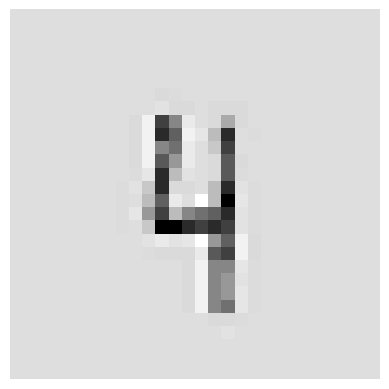

In [234]:
jhin = X[0]
plot_digits(jhin)

In [235]:
sgd_own = SGDClassifier(random_state=42)
sgd_own.fit(X_train_me, y_train_me)
sgd_own.predict([jhin])

ValueError: setting an array element with a sequence.

## 5. Summary, Conclusions and Lessons Learned

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*

***Disclaimer***

*Contents of this Notebook are based on Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow 3rd Edition by Aurelien Geron*
*A copy of the complete text can be obtained here: https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/*